In [14]:
import networkx as nx
import utils as u
from tqdm.notebook import tqdm
from collections import Counter
from itertools import chain
from typing import List, Tuple
import matplotlib.pyplot as plt

mpl_params = {

    'figure.figsize': (25, 13),
}
plt.rcParams.update(mpl_params)

G = u.load_graph()

In [15]:
greedy_part = 1
def calc_greedy_paths1(_orders):
    greedy_payload = dict(zip(G.edges, [0] * len(G.edges)))
    _paths = []
    _used_edges = []
    i = 0
    for order in tqdm(_orders):
        order_prices = {}
        for edge, payload in greedy_payload.items():
            edge_attributes = G[edge[0]][edge[1]]
            predicted_price = u.calc_price(edge_attributes['type'], edge_attributes['dist'], payload + 1)
            actual_price = u.calc_price(edge_attributes['type'], edge_attributes['dist'], payload)
            order_price = predicted_price - actual_price
            order_prices[edge] = order_price

        nx.set_edge_attributes(G, order_prices, 'greedy_price')
        path = nx.shortest_path(G, order[0], order[1], 'greedy_price' if i >= (1 - greedy_part) * len(_orders) else 'dist')
        _paths.append(path)
        path_edges = u.edges_from_path(path)
        for edge in path_edges:
            greedy_payload[edge] += 1
            _used_edges.append(edge)
        i += 1
    _used_edges_payload = Counter(_used_edges)
    return _orders, _paths, _used_edges_payload

  0%|          | 0/10000 [00:00<?, ?it/s]

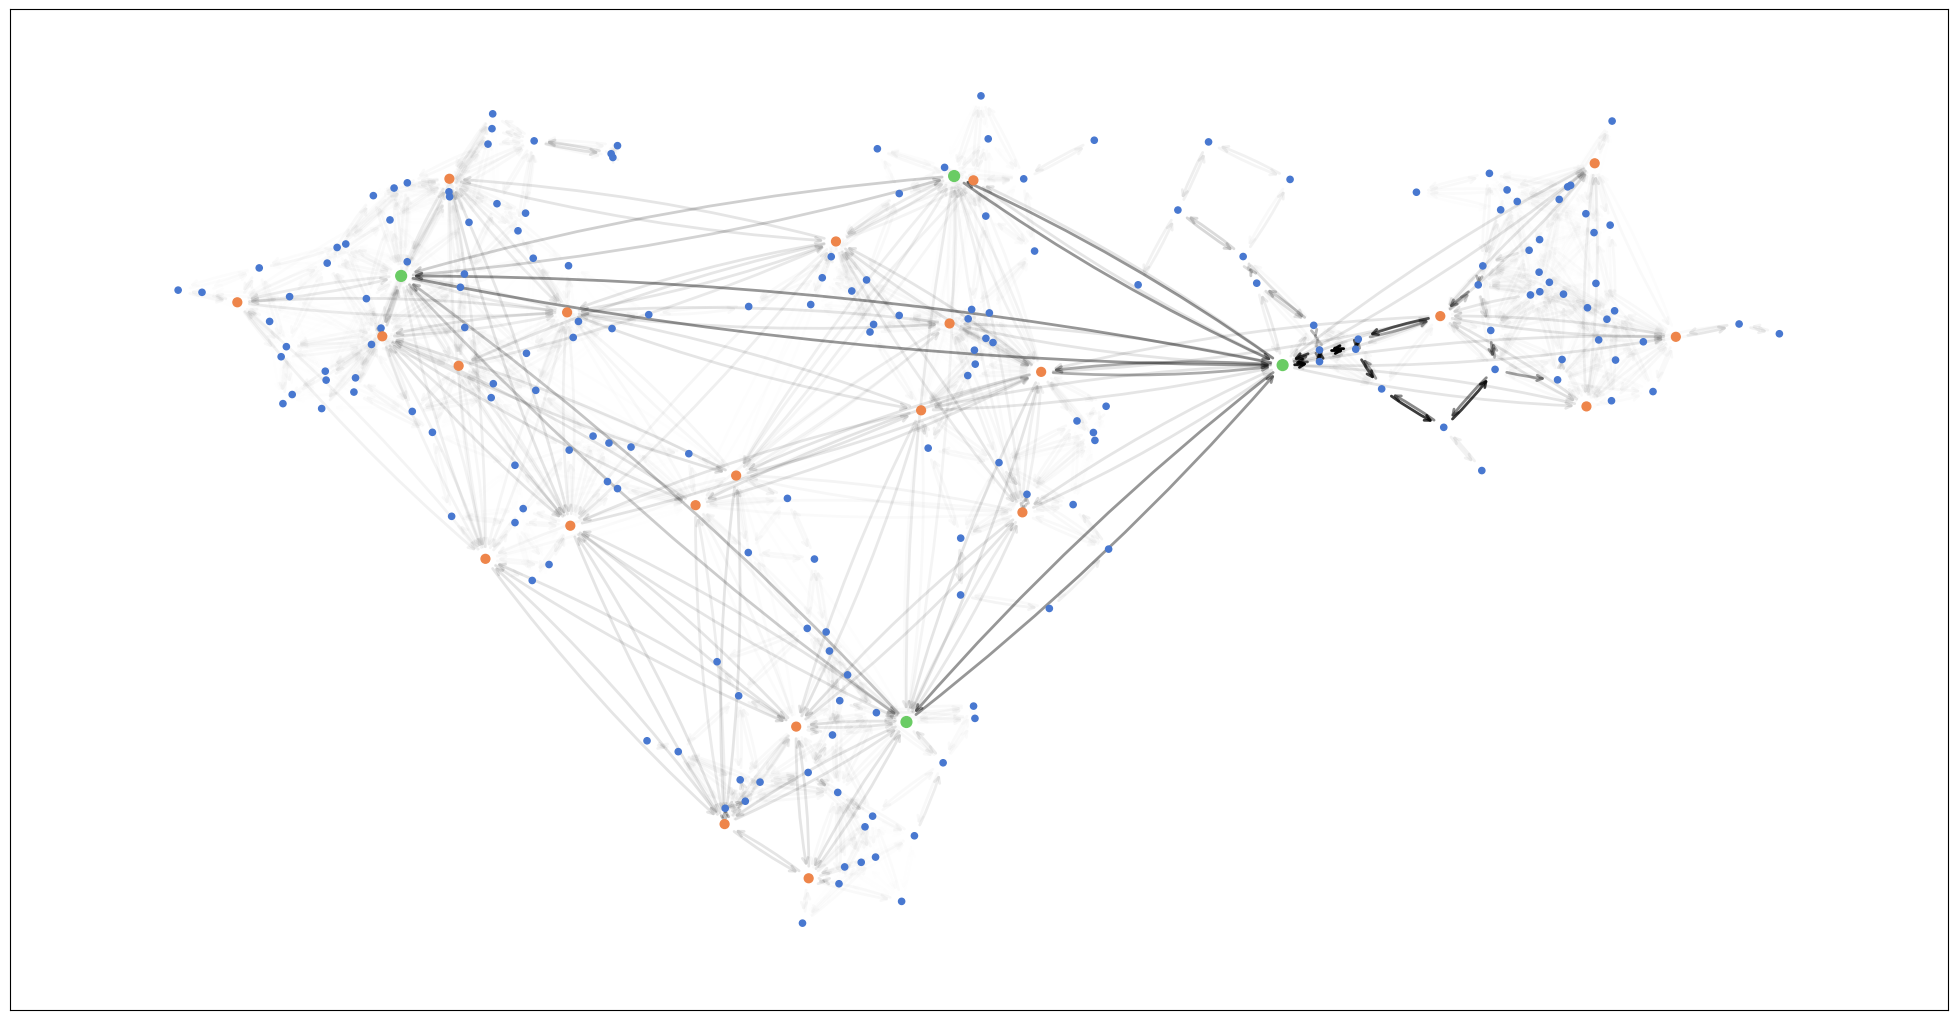

In [16]:
_, _, edges_payload = calc_greedy_paths1(u.generate_orders(G, 10000))
u.draw_payload(G, edges_payload)

In [17]:
edges_prices, total_price =  u.calc_total_price(G, edges_payload)
total_price

2754.795852828489

In [26]:
greedy_part

1.0

In [18]:
steps = 10
prices = []
parts = []
for i in range(steps):
    greedy_part = (i + 1) / steps
    parts.append(greedy_part)
    _, _, edges_payload = calc_greedy_paths1(u.generate_orders(G, 10000))
    _, total_price =  u.calc_total_price(G, edges_payload)
    prices.append(total_price)

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

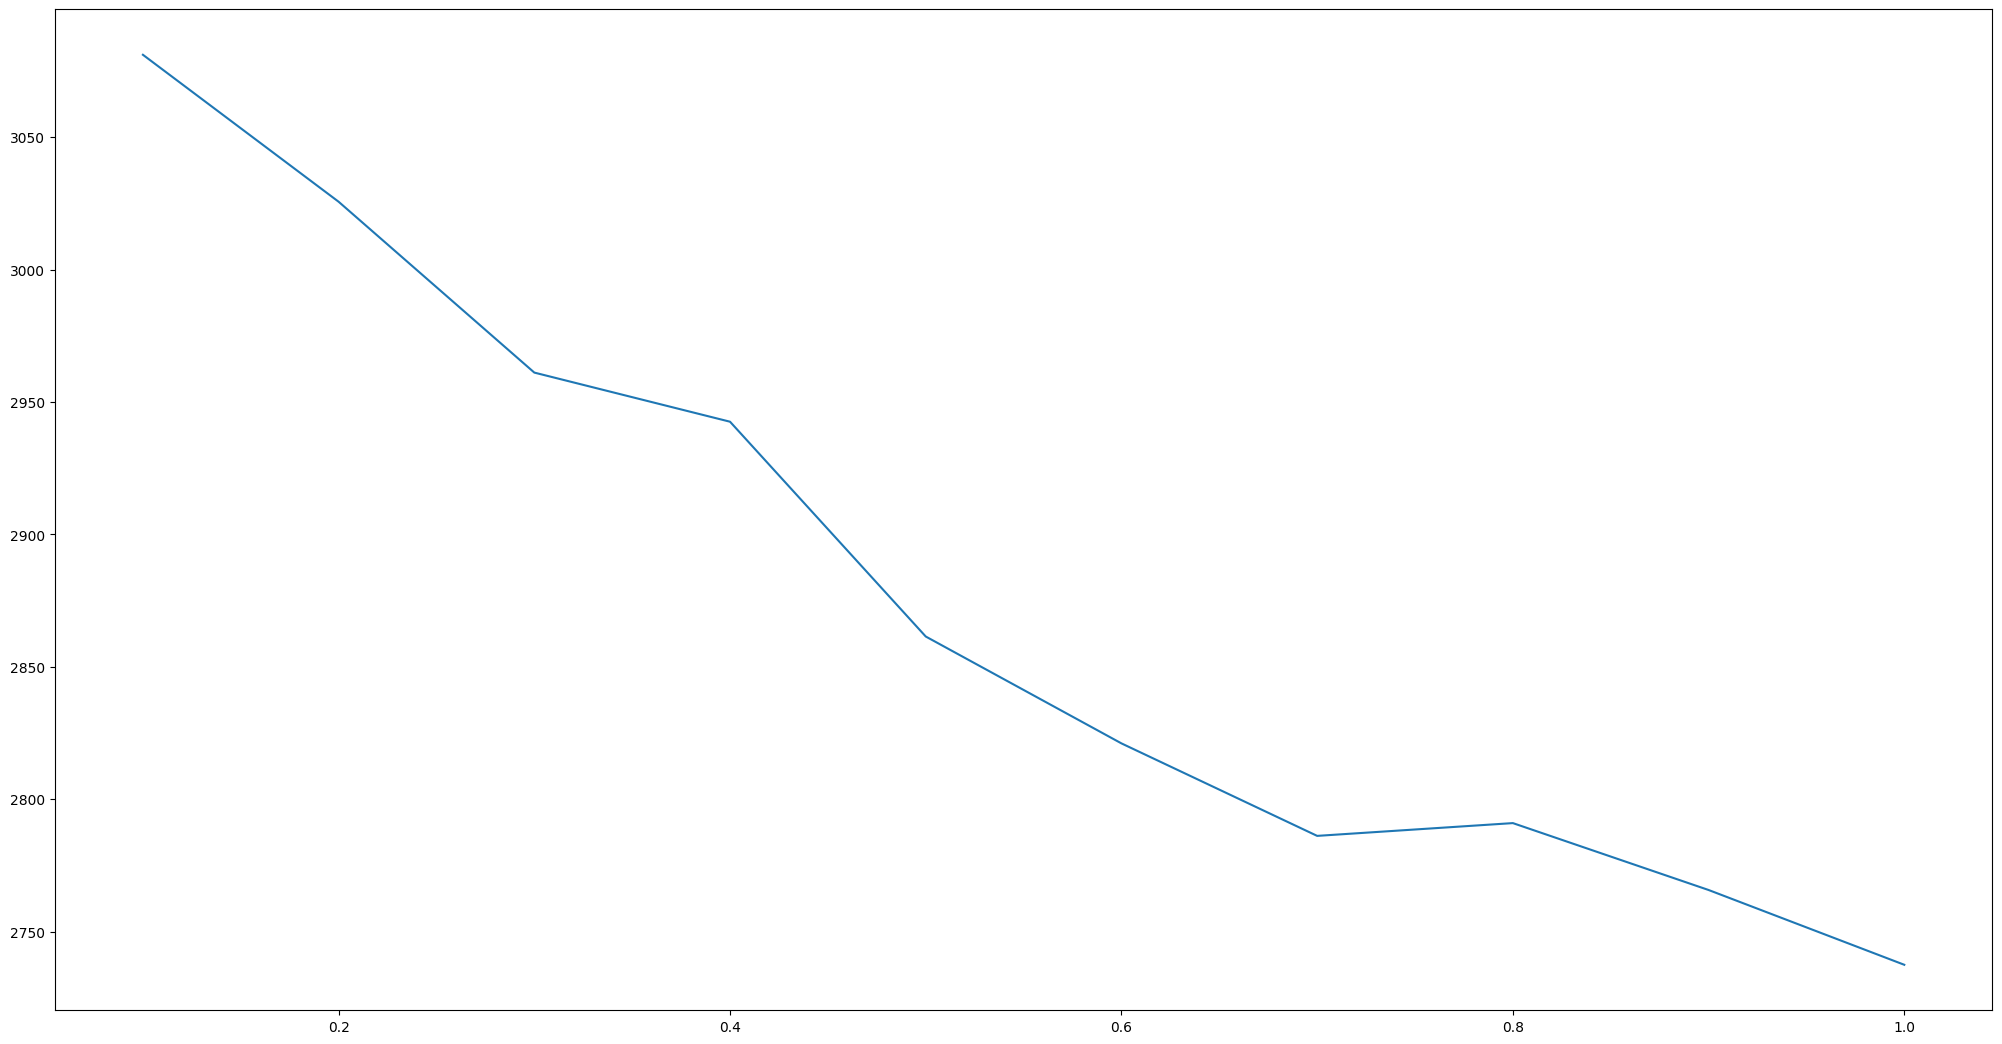

In [19]:
plt.plot(parts, prices)

In [20]:
prices[0]

3081.15941336419

In [21]:
orders_groups = []
for count in tqdm(range(5000, 100001, 5000)):
    orders_groups.append(u.generate_orders(G, count))
list(map(len, orders_groups))

  0%|          | 0/20 [00:00<?, ?it/s]

[5000,
 10000,
 15000,
 20000,
 25000,
 30000,
 35000,
 40000,
 45000,
 50000,
 55000,
 60000,
 65000,
 70000,
 75000,
 80000,
 85000,
 90000,
 95000,
 100000]

In [22]:
import time

results = []
for orders in tqdm(orders_groups):
    t0 = time.time()
    _, paths, edges_payload = calc_greedy_paths1(orders)
    edges_prices, total_price =  u.calc_total_price(G, edges_payload)
    results.append(u.Result(orders, paths, edges_payload, edges_prices, total_price, time.time() - t0))

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/25000 [00:00<?, ?it/s]

  0%|          | 0/30000 [00:00<?, ?it/s]

  0%|          | 0/35000 [00:00<?, ?it/s]

  0%|          | 0/40000 [00:00<?, ?it/s]

  0%|          | 0/45000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/55000 [00:00<?, ?it/s]

  0%|          | 0/60000 [00:00<?, ?it/s]

  0%|          | 0/65000 [00:00<?, ?it/s]

  0%|          | 0/70000 [00:00<?, ?it/s]

  0%|          | 0/75000 [00:00<?, ?it/s]

  0%|          | 0/80000 [00:00<?, ?it/s]

  0%|          | 0/85000 [00:00<?, ?it/s]

  0%|          | 0/90000 [00:00<?, ?it/s]

  0%|          | 0/95000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

In [23]:
import pickle

f = open('results/greedy1.pkl', 'wb')
pickle.dump(results, f)
f.close()

In [24]:
f = open('results/greedy1.pkl', 'rb')
results = pickle.load(f)
f.close()

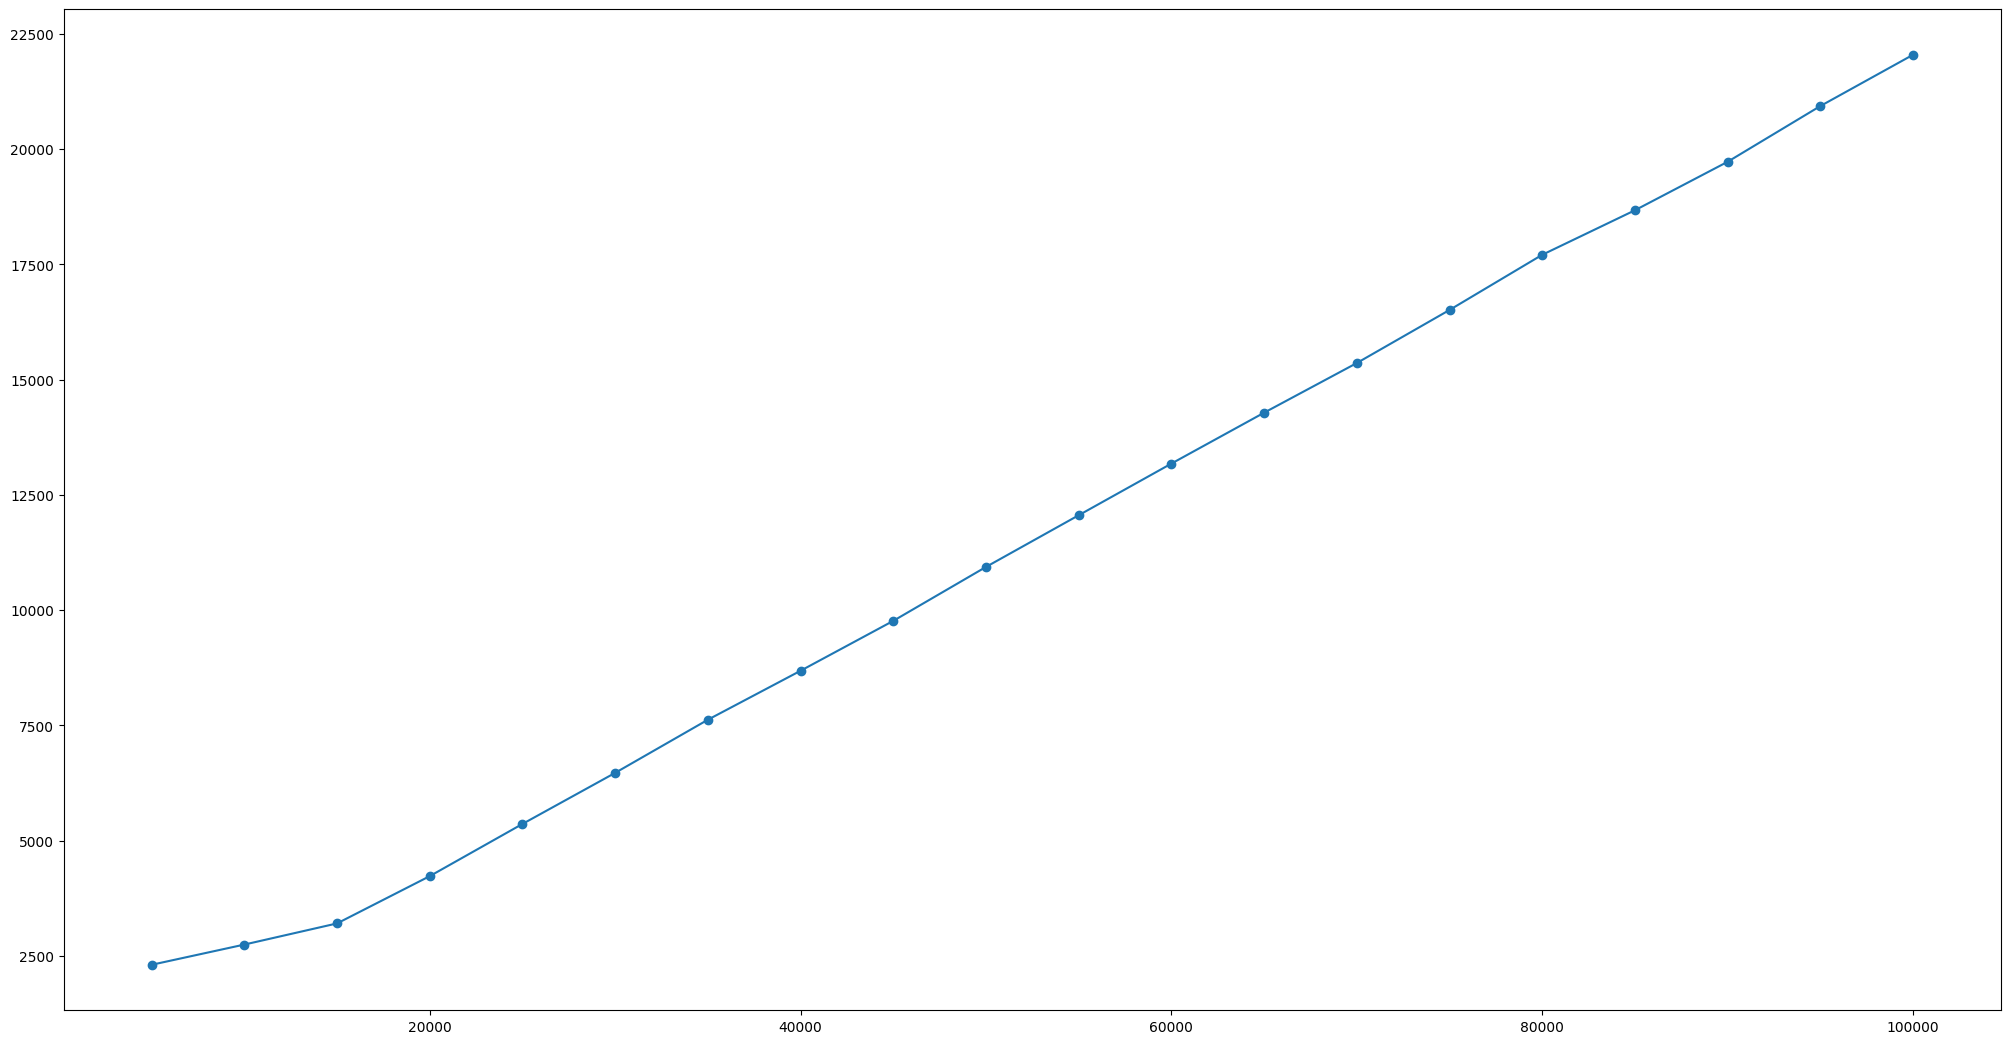

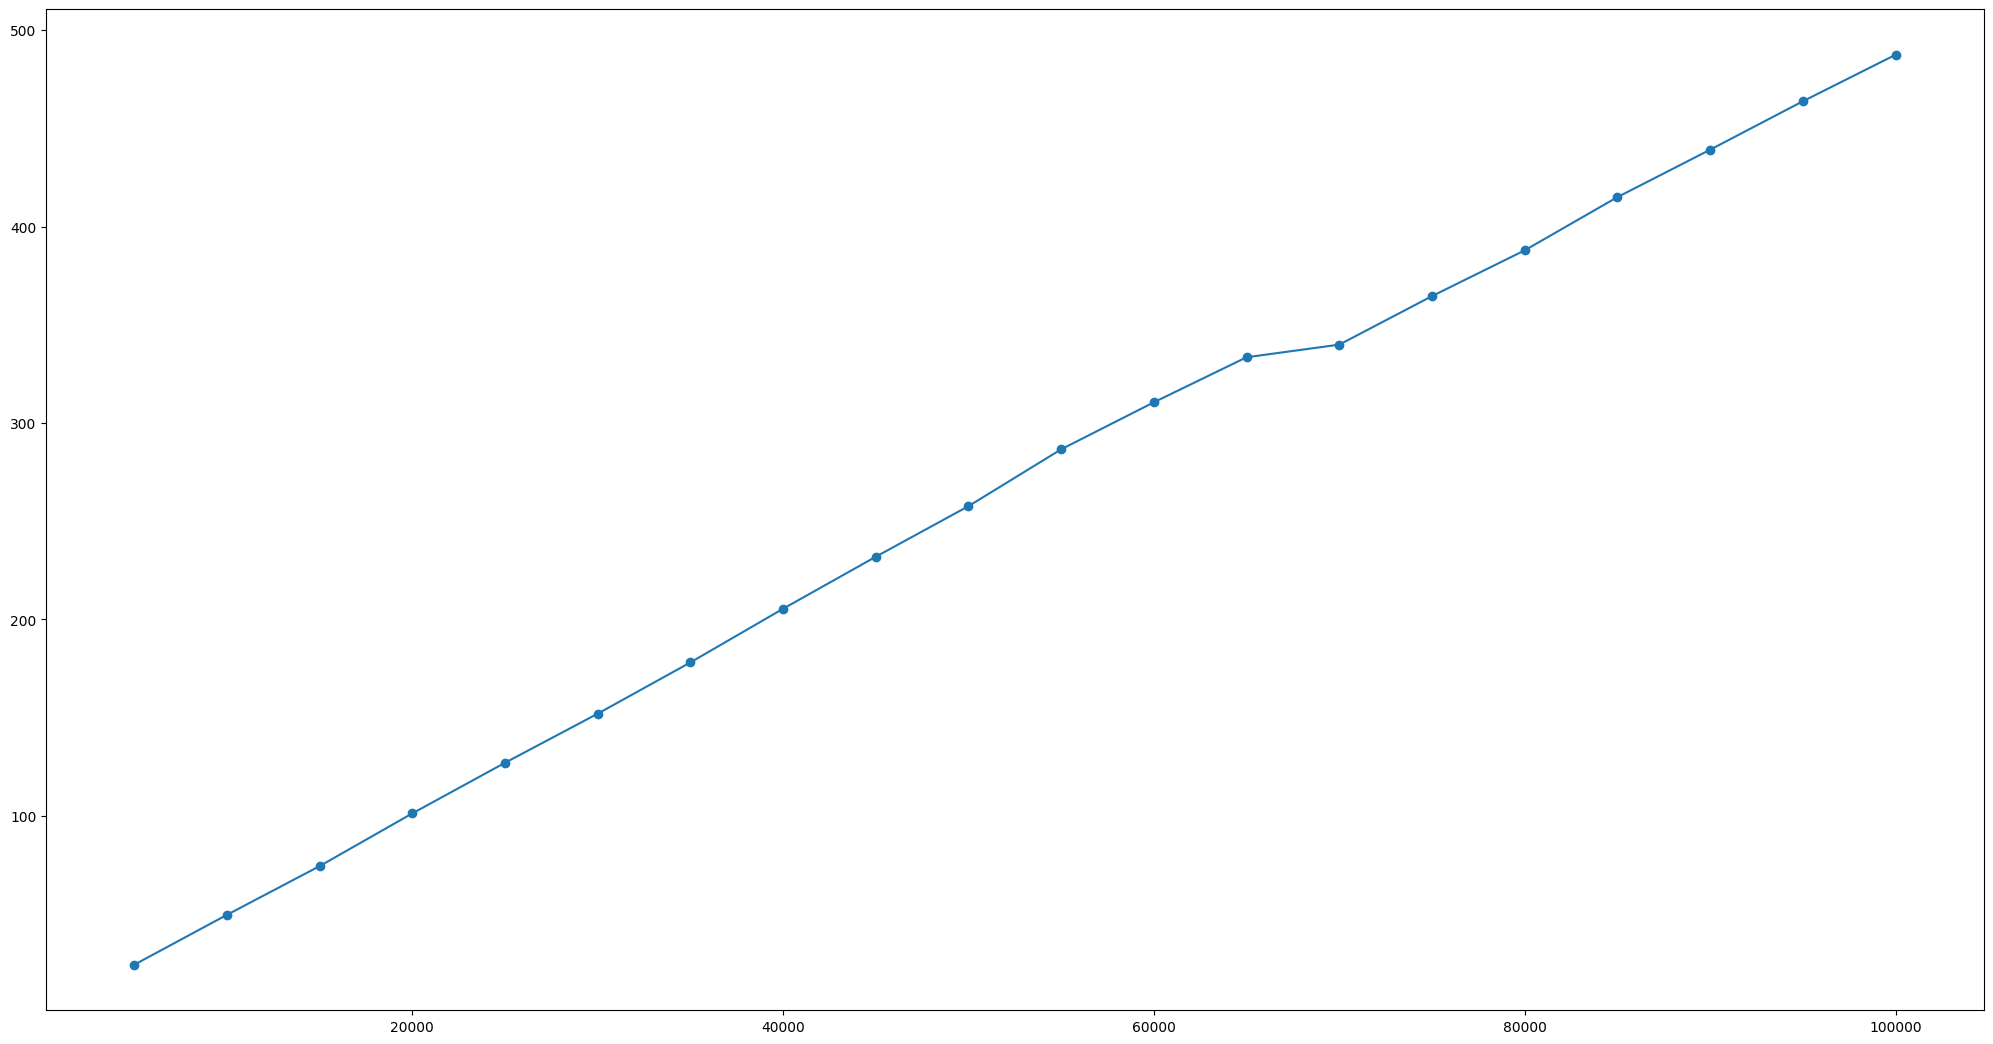

In [25]:
prices = []
times = []
orders_count = []
for result in results:
    prices.append(result.total_price)
    times.append(result.time)
    orders_count.append(len(result.orders))

plt.figure(1)
plt.plot(orders_count, prices)
plt.scatter(orders_count, prices)
plt.figure(2)
plt.plot(orders_count, times)
plt.scatter(orders_count, times)